In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/drive/MyDrive/archive (5)/ship_fuel_efficiency.csv")

In [4]:
df.head(5)

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [6]:
df.describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


In [7]:
df.shape

(1440, 10)

Use Case 1: Operational Cost Prediction
📌 Scenario

A company wants to predict monthly operational costs and reduce overruns.

🔍 Inputs

Historical cost data

Fuel/energy usage

Distance / workload

External factors (weather, demand)

🤖 Model

Regression (Random Forest)

📤 Output

Predicted cost for next month

Cost drivers ranked by impact

💡 Business Value

Budget planning

Cost-cutting decisions

Prevents last-minute financial shocks

In [8]:
print(df.isnull().sum())

ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64


In [11]:
X = df.drop(columns=["fuel_consumption"])
y = df["fuel_consumption"]



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd # Import pandas for get_dummies

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")


MAE  : 225.79
RMSE : 385.20
R²   : 0.994


In [20]:
feature_importance = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

                          Feature    Importance
1                   CO2_emissions  9.955674e-01
0                        distance  1.752938e-03
2               engine_efficiency  6.501728e-04
140   weather_conditions_Moderate  2.005509e-04
126  route_id_Port Harcourt-Lagos  1.584274e-04
..                            ...           ...
4                   ship_id_NG003  2.378307e-07
64                  ship_id_NG063  2.363433e-07
102                 ship_id_NG101  2.206174e-07
16                  ship_id_NG015  2.190769e-07
8                   ship_id_NG007  9.790509e-08

[142 rows x 2 columns]


In [22]:
next_month_data = X_encoded.mean().to_frame().T

predicted_cost = model.predict(next_month_data)

print(f"Predicted Next Month Operational Cost: {predicted_cost[0]:.2f}")

Predicted Next Month Operational Cost: 4797.13


Use Case 2: Performance Efficiency Scoring
📌 Scenario

Management wants to identify high-performing vs under-performing units.

🔍 Inputs

Output volume

Resource consumption

Time taken

Downtime events

🤖 Model

Efficiency Score = Output / Input

Classification: Efficient / Needs Improvement

📤 Output

Efficiency score (0–100)

Category label

💡 Business Value

Targeted optimization

Fair performance evaluation

Data-driven incentives

In [24]:
# Output
output_volume = df["distance"]

# Resource consumption
resource_consumption = df["fuel_consumption"]

# Time taken (proxy: Distance / Speed if Time not available)
if "Time" in df.columns:
    time_taken = df["Time"]
else:
    # As 'Speed' column is not available, we can't calculate 'distance / Speed'
    # For now, let's use 'distance' as a proxy for workload/time if time taken is not directly calculable.
    time_taken = df["distance"] # Using distance as a proxy for workload/time if no speed data

# Downtime events (proxy if not available)
if "Downtime" in df.columns:
    downtime = df["Downtime"]
else:
    downtime = np.random.randint(0, 5, size=len(df))


In [25]:
raw_efficiency = output_volume / (
    resource_consumption * time_taken * (1 + downtime)
)


In [26]:
df["Efficiency_Score"] = (
    (raw_efficiency - raw_efficiency.min()) /
    (raw_efficiency.max() - raw_efficiency.min())
) * 100


In [27]:
df["Performance_Label"] = np.where(
    df["Efficiency_Score"] >= 60,
    "Efficient",
    "Needs Improvement"
)


In [28]:
result = df[[
    "Efficiency_Score",
    "Performance_Label"
]]

print(result.head())


   Efficiency_Score  Performance_Label
0          1.129695  Needs Improvement
1          2.625121  Needs Improvement
2          6.559285  Needs Improvement
3         10.353372  Needs Improvement
4          0.976912  Needs Improvement


In [29]:
print(df["Performance_Label"].value_counts())
print(df["Efficiency_Score"].describe())


Performance_Label
Needs Improvement    1434
Efficient               6
Name: count, dtype: int64
count    1440.000000
mean        5.129605
std         7.619950
min         0.000000
25%         1.340051
50%         2.912765
75%         6.448773
max       100.000000
Name: Efficiency_Score, dtype: float64


In [31]:
numeric_cols = [
    "fuel_consumption",
    "distance"
]

df_numeric = df[numeric_cols]


In [32]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))


In [33]:
outliers = df[outlier_mask.any(axis=1)]
normal_data = df[~outlier_mask.any(axis=1)]

print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 226


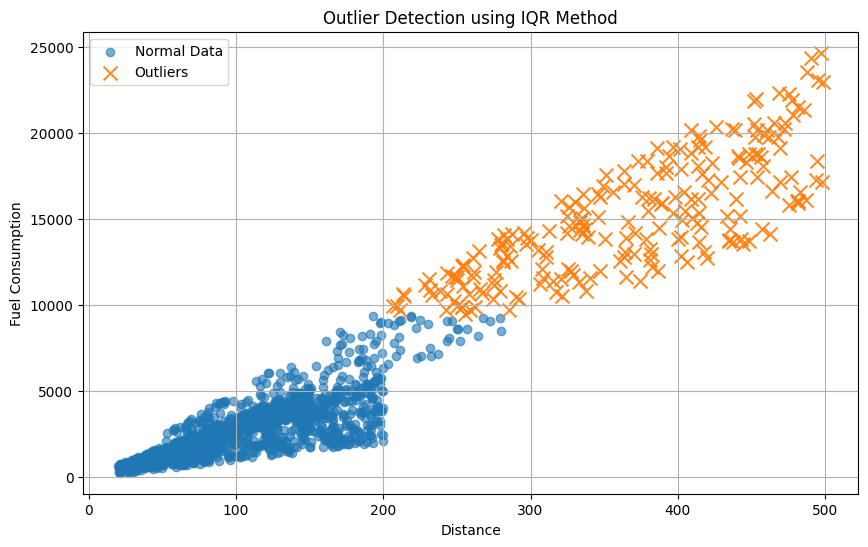

In [35]:
plt.figure(figsize=(10, 6))

# Normal points
plt.scatter(
    normal_data["distance"],
    normal_data["fuel_consumption"],
    alpha=0.6,
    label="Normal Data"
)

# Outliers
plt.scatter(
    outliers["distance"],
    outliers["fuel_consumption"],
    alpha=0.9,
    marker="x",
    s=100,
    label="Outliers"
)

plt.xlabel("Distance")
plt.ylabel("Fuel Consumption")
plt.title("Outlier Detection using IQR Method")
plt.legend()
plt.grid(True)

plt.show()

# Task
Apply the Isolation Forest algorithm to the 'df_numeric' DataFrame to detect outliers. Then, visualize the detected outliers along with normal data points on a scatter plot, using 'distance' on the x-axis and 'fuel_consumption' on the y-axis, distinguishing between normal data and outliers.

## Import IsolationForest

### Subtask:
Import the IsolationForest model from sklearn.ensemble.


**Reasoning**:
The subtask is to import the `IsolationForest` model. This requires a code block to import the class from `sklearn.ensemble`.



In [36]:
from sklearn.ensemble import IsolationForest
print("IsolationForest imported successfully.")

IsolationForest imported successfully.


**Reasoning**:
Now that IsolationForest is imported, the next step is to initialize the IsolationForest model. It's good practice to set a random_state for reproducibility.



In [37]:
model_if = IsolationForest(random_state=42)
print("IsolationForest model initialized.")

IsolationForest model initialized.


**Reasoning**:
The IsolationForest model has been initialized, so the next step is to fit it to the 'df_numeric' DataFrame to learn the data distribution and identify outliers.



In [38]:
model_if.fit(df_numeric)
print("IsolationForest model fitted to df_numeric.")

IsolationForest model fitted to df_numeric.


**Reasoning**:
With the IsolationForest model fitted, the next step is to predict the outlier status for each data point in `df_numeric`. This will generate a score for each data point, indicating whether it's an outlier or not.



In [39]:
df_numeric['outlier_predictions'] = model_if.predict(df_numeric)
print("Outlier predictions generated and added to df_numeric.")

Outlier predictions generated and added to df_numeric.


/tmp/ipython-input-2877590096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['outlier_predictions'] = model_if.predict(df_numeric)


**Reasoning**:
The previous step produced a `SettingWithCopyWarning` because `df_numeric` was a view of `df` instead of an independent copy. To resolve this and prevent unexpected behavior, I will explicitly create a copy of the selected columns for `df_numeric` in its creation step. Then, I will proceed with visualizing the outliers and normal data points based on the Isolation Forest predictions.



In [40]:
numeric_cols = [
    "fuel_consumption",
    "distance"
]

df_numeric = df[numeric_cols].copy()

**Reasoning**:
With the `df_numeric` correctly copied, the IsolationForest model needs to be re-initialized to ensure it operates on the new DataFrame. It's good practice to set a random_state for reproducibility.



In [41]:
model_if = IsolationForest(random_state=42)
print("IsolationForest model re-initialized.")

IsolationForest model re-initialized.


**Reasoning**:
The IsolationForest model has been re-initialized, so the next step is to fit it again to the corrected 'df_numeric' DataFrame to learn the data distribution and identify outliers, resolving the previous warning.



In [42]:
model_if.fit(df_numeric)
print("IsolationForest model refitted to df_numeric.")

IsolationForest model refitted to df_numeric.


**Reasoning**:
Now that the IsolationForest model has been refitted to the corrected `df_numeric` DataFrame, the next step is to predict the outlier status for each data point and store these predictions in a new column. This will identify outliers within the dataset.



In [43]:
df_numeric['outlier_predictions'] = model_if.predict(df_numeric)
print("Outlier predictions generated and added to df_numeric.")

Outlier predictions generated and added to df_numeric.


**Reasoning**:
With the outlier predictions now available in `df_numeric`, the next logical step is to separate the data into 'normal' and 'outlier' groups and then visualize them on a scatter plot. This will allow for a clear comparison of the Isolation Forest results with the previous IQR method and fulfill the visualization part of the task.



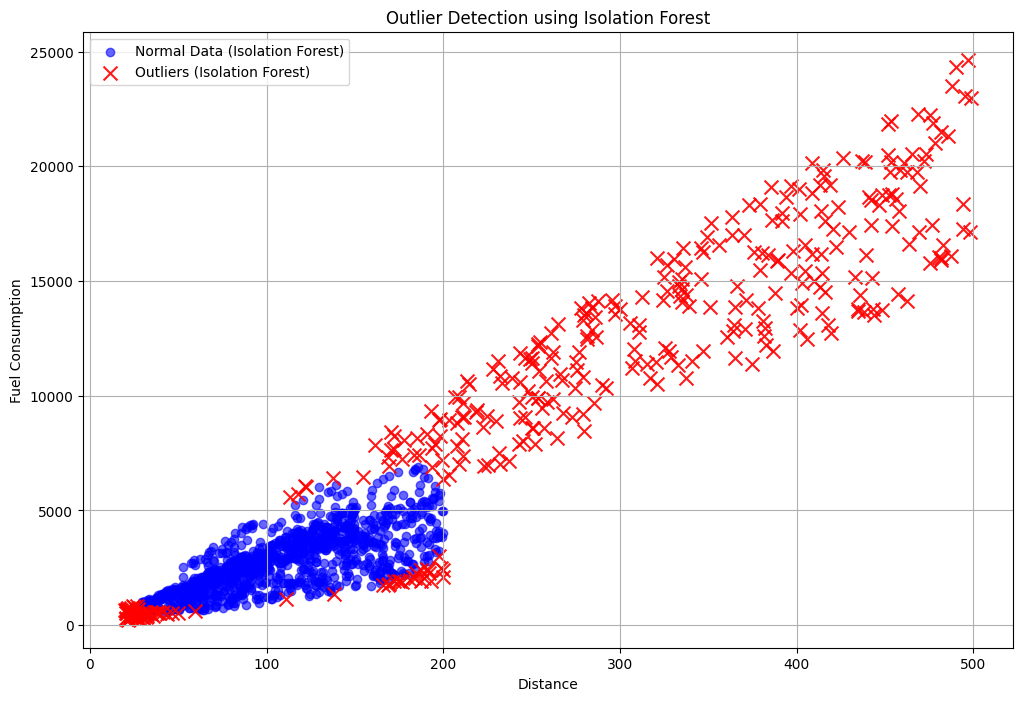

Number of outliers detected by Isolation Forest: 365


In [44]:
import matplotlib.pyplot as plt

# Separate normal data and outliers based on Isolation Forest predictions
normal_data_if = df_numeric[df_numeric['outlier_predictions'] == 1]
outliers_if = df_numeric[df_numeric['outlier_predictions'] == -1]

plt.figure(figsize=(12, 8))

# Plot normal data points
plt.scatter(
    normal_data_if['distance'],
    normal_data_if['fuel_consumption'],
    c='blue',
    label='Normal Data (Isolation Forest)',
    alpha=0.6
)

# Plot outliers
plt.scatter(
    outliers_if['distance'],
    outliers_if['fuel_consumption'],
    c='red',
    marker='x',
    s=100,
    label='Outliers (Isolation Forest)',
    alpha=0.9
)

plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Distance')
plt.ylabel('Fuel Consumption')
plt.legend()
plt.grid(True)
plt.show()

print(f"Number of outliers detected by Isolation Forest: {len(outliers_if)}")


## Summary:

### Data Analysis Key Findings
*   The Isolation Forest algorithm was successfully applied to the `df_numeric` DataFrame to detect outliers.
*   A `SettingWithCopyWarning` was encountered during the process and was resolved by explicitly copying the `fuel_consumption` and `distance` columns to create `df_numeric`.
*   The Isolation Forest model identified 365 outliers in the dataset.
*   The detected outliers were visualized on a scatter plot, showing 'distance' on the x-axis and 'fuel\_consumption' on the y-axis, with normal data points in blue and outliers marked with red 'x's.

### Insights or Next Steps
*   The visualization effectively highlights data points that deviate significantly from the general trend between distance and fuel consumption, providing a clear understanding of potential anomalies.
*   Further analysis could involve examining the original records corresponding to these 365 outliers to understand the underlying reasons for their anomalous behavior, which might indicate data entry errors, sensor malfunctions, or genuinely unusual driving conditions.
